<a href="https://colab.research.google.com/github/Hiago-Cavalcante/Ia_DFS_BFS/blob/main/Minera%C3%A7ao_resumo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###1. Obter dados

In [ ]:
# 1. Obtenção dos dados (estruturados) a partir de um arquivo csv

dados = pd.read_csv('/content/drive/MyDrive/Graduação - GI/2024.2/Mineração de Dados/YTEleicoes2024.csv')
dadosOriginais = dados.copy()

###2. Pré-processamento de dados

In [ ]:
# Informações gerais sobre os atributos para verificar inconsistências ou dados faltantes
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IdPublicacao           7050 non-null   int64 
 1   TipoPublicacao         7050 non-null   object
 2   DataHora               7050 non-null   object
 3   QtdeReacoes            7050 non-null   int64 
 4   QtdeComentarios        7050 non-null   int64 
 5   QtdeCompartilhamentos  7050 non-null   int64 
 6   QtdeCurtidas           7050 non-null   int64 
 7   FreqAmor               7050 non-null   int64 
 8   FreqSurpresa           7050 non-null   int64 
 9   FreqAlegria            7050 non-null   int64 
 10  FreqTristeza           7050 non-null   int64 
 11  FreqRaiva              7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [ ]:
# Distribuição das publicações por tipo

dados.groupby('TipoPublicacao')['IdPublicacao'].count()/dados['IdPublicacao'].count()*100

#sns.countplot(x='TipoPublicacao', data=dados)



###3. Transformação de dados

In [ ]:
# Transformação dos dados qualitativos em representação numérica
# Motivação: modelo computacional


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dados['TipoPublicacao'] = label_encoder.fit_transform(dados['TipoPublicacao'])

In [ ]:
dados.columns

In [ ]:
dados.head(1)

In [ ]:
# Modelo de Aprendizado Não Supervisionado - Clustering

# Separar atributos RELEVANTES para o modelo

dadosX = dados[['TipoPublicacao', 'QtdeReacoes','QtdeComentarios', 'QtdeCompartilhamentos', 'QtdeCurtidas', 'FreqAmor',
       'FreqSurpresa', 'FreqAlegria', 'FreqTristeza', 'FreqRaiva']]

# Padronizar os dados, normalizando em relação à media
# (diferença de grandeza entre os atritubos)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
dadosX = scaler.fit_transform(dadosX)

dadosX = pd.DataFrame(dadosX, columns=['TipoPublicacao', 'QtdeReacoes','QtdeComentarios', 'QtdeCompartilhamentos', 'QtdeCurtidas', 'FreqAmor',
       'FreqSurpresa', 'FreqAlegria', 'FreqTristeza', 'FreqRaiva'])

dadosX.head(2)

,TipoPublicacao,QtdeReacoes,QtdeComentarios,QtdeCompartilhamentos,QtdeCurtidas,FreqAmor,FreqSurpresa,FreqAlegria,FreqTristeza,FreqRaiva
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.14003,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.00000,0.000000,0.000000,0.000000,0.0


###4. Mineração de dados

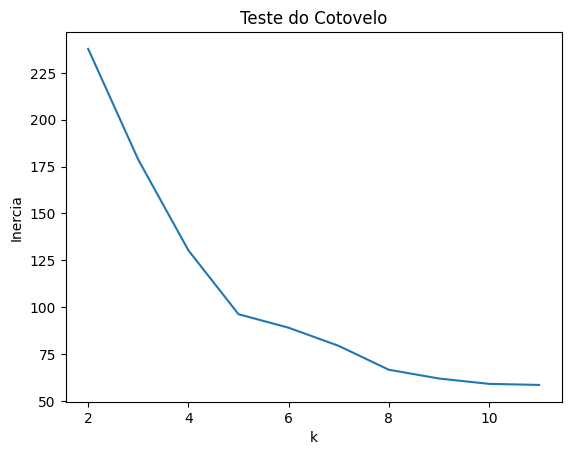

In [ ]:
# Agrupamento de dados - K-Means

# 4.1 Implementar o modelo de agrupamento inicial

from sklearn.cluster import KMeans

inercia = []

# 4.2 Implementar o modelo de agrupamento alterando os parâmetros

for k in range(2,12):
  modeloAgrupamento = KMeans(n_clusters=k,random_state=0)
  modeloAgrupamento.fit(dadosX)
  inercia.append(modeloAgrupamento.inertia_)

# Validar os parâmetros a partir das métricas de avaliação de desempenho do modelo
# Qual o ótimo global

plt.plot(range(2,12),inercia)
plt.title('Teste do Cotovelo')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.show()


<Axes: >

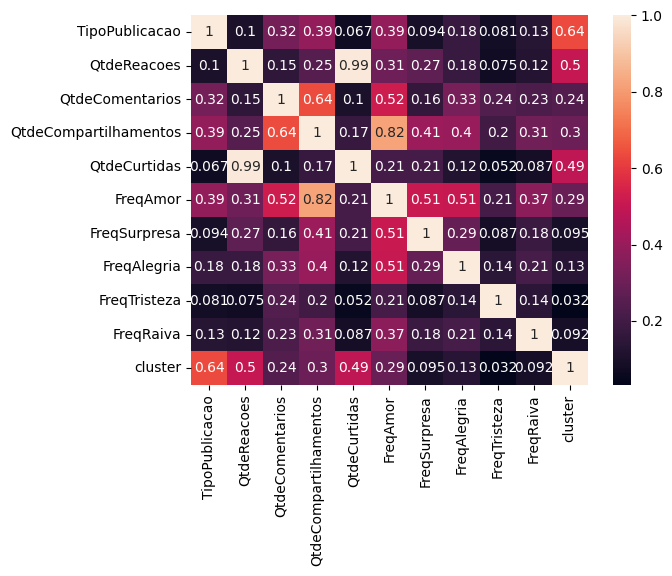

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(dadosX)

rotulos = kmeans.labels_

dadosX['cluster'] = rotulos

sns.heatmap(dadosX.corr(), annot=True)






<Axes: xlabel='QtdeReacoes', ylabel='QtdeCurtidas'>

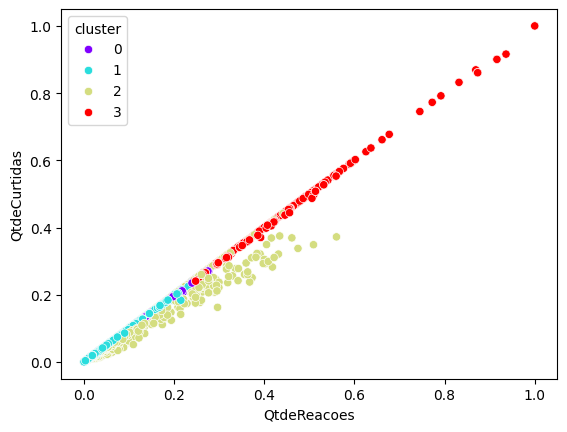

In [ ]:
sns.scatterplot(data=dadosX, x='QtdeReacoes', y='QtdeCurtidas', hue='cluster',palette='rainbow')

In [ ]:
# PLUS DA AULA

# Redução da dimensionalidade dos dados - REPRESENTAÇÃO

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(dadosX)

datapoint = pca.transform(dadosX)

datapoint.shape

datapoint[0]

array([0.75726358, 0.18803165])

<Axes: xlabel='componente1', ylabel='componente2'>

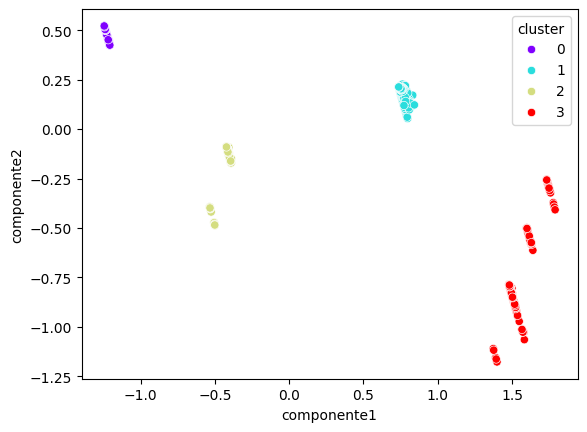

In [ ]:


datapointData = pd.DataFrame(datapoint, columns=['componente1','componente2'])
datapointDataK = kmeans.fit_transform(datapointData)
rotulos2 = kmeans.labels_
datapointData['cluster'] = rotulos2
sns.scatterplot(data=datapointData, x='componente1', y='componente2', hue='cluster',palette='rainbow')

CONCLUSÃO: Melhor representação, melhor a separação dos grupos
